Text clustering can be applied to enhance customer service, streamline product feedback management, and optimize marketing strategies. By categorizing reviews into meaningful clusters, Amazon can efficiently address customer concerns, improve product recommendations, and ultimately enhance the overall shopping experience. As the volume of unstructured data continues to grow, text clustering offers a crucial tool for managing and deriving insights from the vast amounts of information in the Amazon Fine Food Review dataset.


Download Dataset from Kaggle.

Explore and Preprocess the textual data.

Convert text to numerical format using TF-IDF.

Apply K-Means clustering algorithm.

Assign clusters to the dataset.

Visualize the clusters using PCA.

Evaluate clustering performance.

In [45]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score


# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for word embedding
import gensim
from gensim.models import Word2Vec #Word2Vec is mostly used for huge datasets

In [46]:
import warnings
warnings.filterwarnings('ignore')


In [47]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Try setting different encodings with quoting

data = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip', encoding='utf-8', quoting=3)
# quoting = 3 tells pandas to ignore quotes



In [48]:
#the first five columns
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"""Product arrived labeled as Jumbo Salted Peanu..."
2,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
3,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
4,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [49]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Try setting different encodings with quoting

data = pd.read_csv('/content/Reviews.csv', on_bad_lines='skip', encoding='utf-8', quoting=3)
# quoting = 3 tells pandas to ignore quotes

# Convert 'Time' column to numeric, coerce errors to NaN
data['Time'] = pd.to_numeric(data['Time'], errors='coerce')

# Remove rows with NaN in 'Time' column
data = data.dropna(subset=['Time'])

# Now sorting should work
data.sort_values(['Time'], ascending=True, inplace=True)
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
71741,259392,B000H7LVKY,AFNBSWALDKKM8,"""Richard OConor """"not a doctor",Jim,"just a PhD""""""",0,0,5,1314662400
90637,279427,B000I0VLUK,A2416MXGDU5D1K,"""Audrey Beerman """"wife",new mom,CMO,"rockstar""""""",0,0,4
74589,262370,B00115P12A,AJX1E1XFE3J45,"""KVA """"42 yr old Mom",Fan of Chill,Jazz,"Dance...""",0,0,5
96405,285556,B0046XKKMA,A1IGW0OZTVUHQ1,"""Erminda Flores """"dolls",kittens,"& molls""""""",0,0,1,1350172800
78878,266888,B004BKLHOS,A9JLE9BISQFUB,"""Benjamin Devey """"Author",screenwriter,"songwri...""",0,0,5,1299283200


In [50]:
data.drop(['ProductId', 'ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time'], inplace =True, axis = 1)

In [51]:
score = []
for i in data['Score']:
    try:
        if int(i) < 3:
            score.append('0')
        else:
            score.append('1')
    except ValueError:
        # Handle the exception, e.g., by assigning a default value
        score.append('0')
data['Score'] = score

In [52]:
data.head()

,Id,UserId,Score,Summary,Text
71741,259392,AFNBSWALDKKM8,0,5,1314662400
90637,279427,A2416MXGDU5D1K,0,0,4
74589,262370,AJX1E1XFE3J45,0,0,5
96405,285556,A1IGW0OZTVUHQ1,0,1,1350172800
78878,266888,A9JLE9BISQFUB,0,5,1299283200


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
total_size=len(data)
train_size=int(0.70*total_size)
train=data.head(train_size)
test=data.tail(total_size - train_size)

In [55]:
train.Score.value_counts()

,count
Score,
1,66163
0,10375


In [56]:
train = train[train.Score != 3]
test = test[test.Score != 3]

In [57]:
print(train.shape)
print(test.shape)

(76538, 5)
(32802, 5)


In [58]:
train['Score'].value_counts()

,count
Score,
1,66163
0,10375


In [59]:
test['Score'].value_counts()

,count
Score,
1,27946
0,4856


In [60]:
#columnsof the data
data.columns

Index(['Id', 'UserId', 'Score', 'Summary', 'Text'], dtype='object')

In [61]:
lst_text = train['Text'].tolist()
lst_summary = train['Summary'].tolist()

In [62]:

lst_text

['1314662400',
 '4',
 '5',
 '1350172800',
 '1299283200',
 '1350604800',
 '1349222400',
 '5',
 '1332720000',
 '1305417600',
 '1268006400',
 '1175731200',
 '1322179200',
 '1351036800',
 '1299542400',
 '4',
 '1332201600',
 '1265587200',
 '1301184000',
 '1343088000',
 '1336953600',
 '1320710400',
 '1346284800',
 '1338508800',
 '1315958400',
 '1337299200',
 '1351036800',
 '1330560000',
 '1343174400',
 '1332374400',
 'Caution - Mold infested Berries',
 '1338163200',
 '1344643200',
 '1254355200',
 '"Honey Grahams Instead',
 'Third Party Seller not recommended',
 'Pet food and/or treats from China',
 '5',
 '4',
 'Shipping is a problem',
 'AGREE w/ BEWARE!!!',
 'Mixed Lifesavor flavors with no return possible.',
 'Bad Experience purchase this product',
 '1253404800',
 '1322438400',
 'Poisons from China',
 '"BUY CONDENSED MILK',
 'Disappointing...',
 'not happy',
 'Was Not Impressed',
 'Oily taste',
 '1317686400',
 '1298851200',
 '1270080000',
 '1250294400',
 'Yeast expiration date',
 'not happy

In [63]:
lst_text = [str(item).lower() for item in lst_text]
lst_summary = [str(item).lower() for item in lst_summary]

In [64]:
test_text = ['Example Text 1', 'Example Text 2'] # define test_text first with example data
test_text = [str(item).lower() for item in test_text]


In [65]:
import re
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

for i in range(len(lst_text)):
    lst_text[i] = striphtml(lst_text[i])
    lst_summary[i] = striphtml(lst_summary[i])

In [66]:
for i in range(len(test_text)):
    test_text[i] = striphtml(test_text[i])

In [67]:
lst_text[0:5]

['1314662400', '4', '5', '1350172800', '1299283200']

In [68]:
lst_summary[0:6]

['5', '0', '0', '1', '5', '5']

In [69]:
for i in range(len(lst_text)):
    lst_text[i] = re.sub(r'[^A-Za-z]+', ' ', lst_text[i])
    lst_summary[i] = re.sub(r'[^A-Za-z]+', ' ', lst_summary[i])

In [70]:
for i in range(len(test_text)):
    test_text[i] = re.sub(r'[^A-Za-z]+', ' ', test_text[i])

In [71]:
lst_text[0:5]

[' ', ' ', ' ', ' ', ' ']

In [72]:

test_text = [str(item).lower() for item in test_text]


In [73]:
test_text = test['Text'].tolist()
test_text

['Pumpkin Spice is my favorite.  The order arrived quickly and in terrific shape.  Product was as ordered and I am very happy with the results of this order.  A+++',
 'I am very happy that I ordered this vitamin. It does miracle for my daughter. She no longer has mood swings during that time of the month. Thank you so much!',
 '"1) Price: Should be about $25. Amazon doesn\'t always stock this themselves',
 'I bought these for myself because of being on weight watchers and sometimes I want that salty snack.  My husband and friends who are not watching their weight also loved them.',
 'My 2 & 3 year old love these as snacks. My husband and I love munching on them too! Best brand ever!!',
 "This is the best jerky ever!!! I cant let the bag go till it's empty! Just perfect! Will buy again and highly recommend to you.",
 'The noodles in the box were all broken.  The sauce was over salted and did not have a good flavor.  I threw out most of the skillet.  I would recommend not purchasing this

In [74]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [76]:
%time
stop_words = set(stopwords.words('english'))
for i in range(len(lst_text)):
    text_filtered = []
    summary_filtered = []
    text_word_tokens = []
    summary_word_tokens = []
    text_word_tokens = lst_text[i].split()
    summary_word_tokens = lst_summary[i].split()
    for r in text_word_tokens:
        if not r in stop_words:
            text_filtered.append(r)
    lst_text[i] = ' '.join(text_filtered)
    for r in summary_word_tokens:
        if not r in stop_words:
            summary_filtered.append(r)
    lst_summary[i] = ' '.join(summary_filtered)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


In [77]:
for i in range(len(test_text)):
    text_filtered = []
    text_word_tokens = []
    # Check if the element is a string before calling split()
    if isinstance(test_text[i], str):
        text_word_tokens = test_text[i].split()
        for r in text_word_tokens:
            if not r in stop_words:
                text_filtered.append(r)
        test_text[i] = ' '.join(text_filtered)
    # Handle the case where the element is not a string (e.g., a float)
    else:
        # You might want to handle floats differently, like replacing them with an empty string
        test_text[i] = ''

In [78]:
%time
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
for i in range(len(lst_text)):
    text_filtered = []
    summary_filtered = []
    text_word_tokens = []
    summary_word_tokens = []
    text_word_tokens = lst_text[i].split()
    summary_word_tokens = lst_summary[i].split()
    for r in text_word_tokens:
        text_filtered.append(str(stemmer.stem(r)))
    lst_text[i] = ' '.join(text_filtered)
    for r in summary_word_tokens:
        summary_filtered.append(str(stemmer.stem(r)))
    lst_summary[i] = ' '.join(summary_filtered)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [79]:
for i in range(len(test_text)):
    text_filtered = []
    text_word_tokens = []
    text_word_tokens = test_text[i].split()
    for r in text_word_tokens:
        if not r in stop_words:
            text_filtered.append(str(stemmer.stem(r)))
    test_text[i] = ' '.join(text_filtered)

In [80]:
lst_text[0:5]

['', '', '', '', '']

In [81]:

test_text[0:5]

['pumpkin spice favorite. the order arriv quick terrif shape. product order i happi result order. a+++',
 'i happi i order vitamin. it miracl daughter. she longer mood swing time month. thank much!',
 '"1) price: should $25. amazon alway stock',
 'i bought weight watcher sometim i want salti snack. my husband friend watch weight also love them.',
 'my 2 & 3 year old love snacks. my husband i love munch too! best brand ever!!']

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
vocab = CountVectorizer()
train_bow = vocab.fit_transform(lst_text)

In [83]:
train_bow

<76538x21451 sparse matrix of type '<class 'numpy.int64'>'
	with 1147416 stored elements in Compressed Sparse Row format>

In [84]:
X_test_dtm = vocab.transform(test_text)
X_test_dtm

<32802x21451 sparse matrix of type '<class 'numpy.int64'>'
	with 507809 stored elements in Compressed Sparse Row format>

In [85]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_bow, train.Score)

MultinomialNB()

In [86]:
y_pred_class_nb = nb.predict(X_test_dtm)

In [87]:
from sklearn import metrics
metrics.accuracy_score(test.Score, y_pred_class_nb)

0.8701603560758491

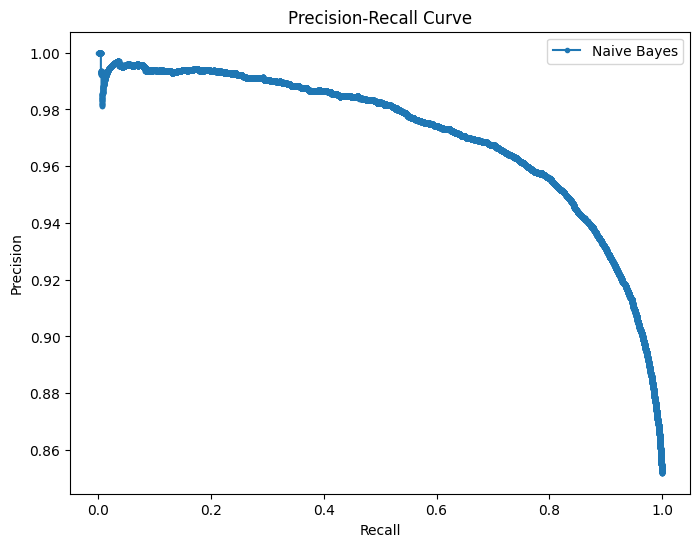

In [90]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn import metrics

# Assuming 'nb' is your fitted Naive Bayes model and 'X_test_dtm' is your test data
y_pred_probs_nb = nb.predict_proba(X_test_dtm)[:, 1] # calculate predicted probabilities

# Convert test.Score to numeric values
precision, recall, thresholds = precision_recall_curve(test.Score.astype(int), y_pred_probs_nb)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Naive Bayes')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()